# Importing dataset and libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")
sbn.set(style="darkgrid");

In [3]:
loan = pd.read_csv("loan.csv")

In [4]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
loan.shape

(614, 13)

### descriptive statistics

In [10]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


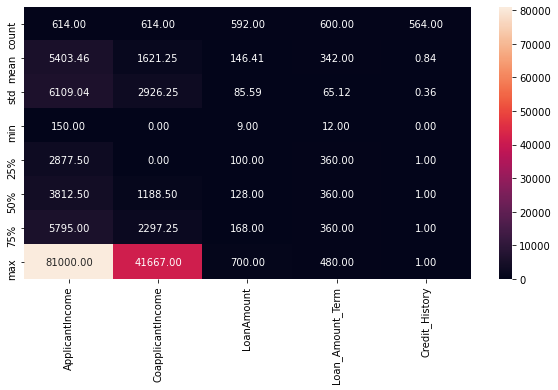

In [12]:
plt.figure(figsize = [10,5])
sns.heatmap(loan.describe(), annot=True, linecolor = "White", fmt = "0.2f")

In [14]:
loan_column = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
for val in loan_column:
    print(loan[val].unique())

['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP001289' 'LP001

# Exploratory Data Analysis & Data Cleaning 

#### spliting the categorical and numerical values for better visuvalization

In [20]:
cat_loan = loan[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area', 'Loan_Status']].copy()

In [21]:
cat_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


# replace the missing value

In [22]:
cat_loan.isnull().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

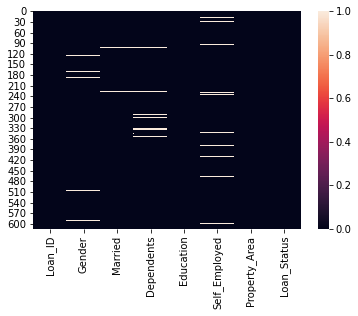

In [26]:
sns.heatmap(cat_loan.isnull())

# simple imputer to replace missing values


In [28]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = "most_frequent")
cat_loan["Gender"] = imp.fit_transform(cat_loan["Gender"].values.reshape(-1,1))
cat_loan["Married"] = imp.fit_transform(cat_loan["Married"].values.reshape(-1,1))
cat_loan["Dependents"] = imp.fit_transform(cat_loan["Dependents"].values.reshape(-1,1))
cat_loan["Self_Employed"] = imp.fit_transform(cat_loan["Self_Employed"].values.reshape(-1,1))

In [29]:
cat_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


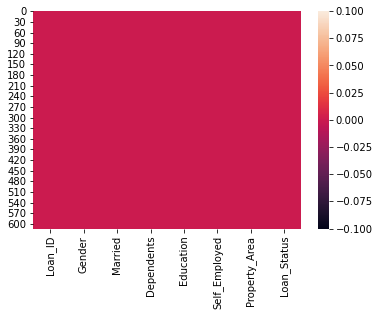

In [30]:
sns.heatmap(cat_loan.isnull())

### Univariate Analysis

#### Count plot for categorical variables

Text(0.5, 1.0, 'Gender count')

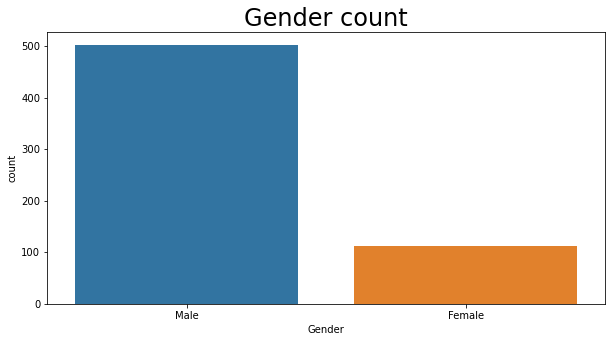

In [31]:
#count plot for categorical variable Attrition 
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=cat_loan, x="Gender")
#plt.xticks(rotation=90)
plt.title("Gender count", fontsize = 24)

Text(0.5, 1.0, 'Married count')

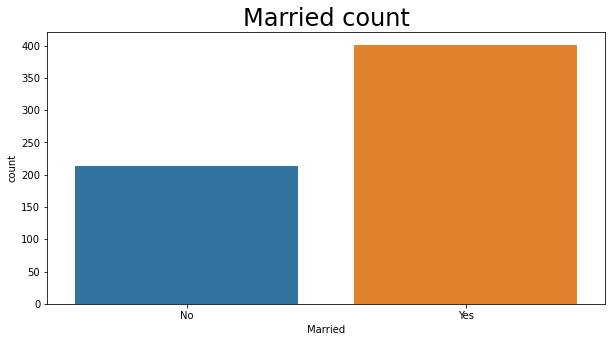

In [33]:
#count plot for categorical variable Attrition 
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=cat_loan, x="Married")
#plt.xticks(rotation=90)
plt.title("Married count", fontsize = 24)

Text(0.5, 1.0, 'Dependents count')

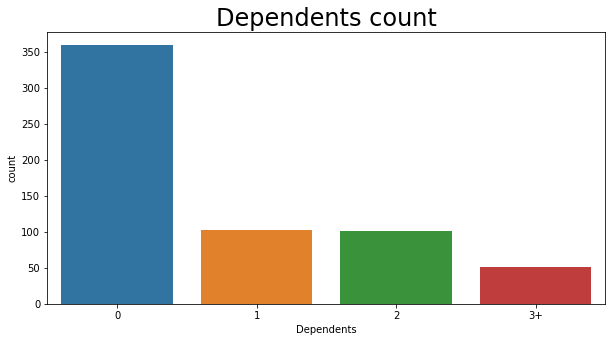

In [35]:
#count plot for categorical variable Attrition 
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=cat_loan, x="Dependents")
#plt.xticks(rotation=90)
plt.title("Dependents count", fontsize = 24)

In [36]:
cat_loan["Dependents"] = cat_loan["Dependents"].replace(['3+'], 3)

Text(0.5, 1.0, 'Dependents count')

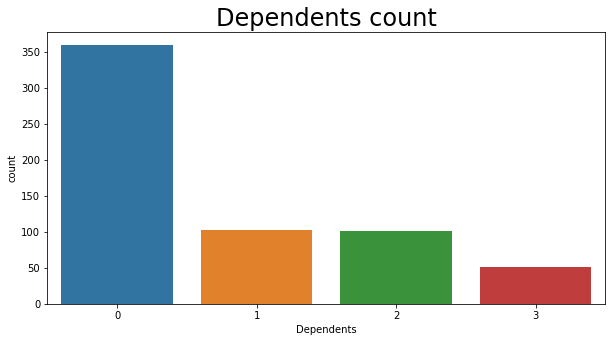

In [37]:
#count plot for categorical variable Attrition 
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=cat_loan, x="Dependents")
#plt.xticks(rotation=90)
plt.title("Dependents count", fontsize = 24)

Text(0.5, 1.0, 'Education count')

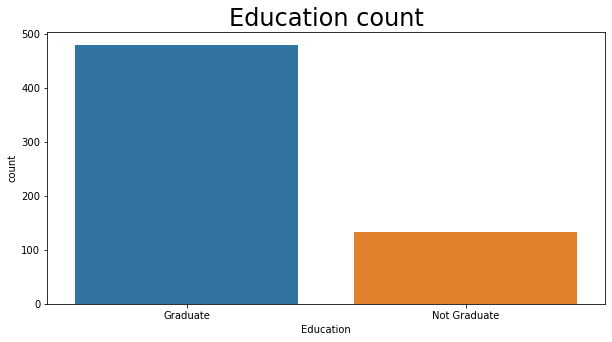

In [38]:
#count plot for categorical variable Attrition 
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=cat_loan, x="Education")
#plt.xticks(rotation=90)
plt.title("Education count", fontsize = 24)

Text(0.5, 1.0, 'Self_Employed count')

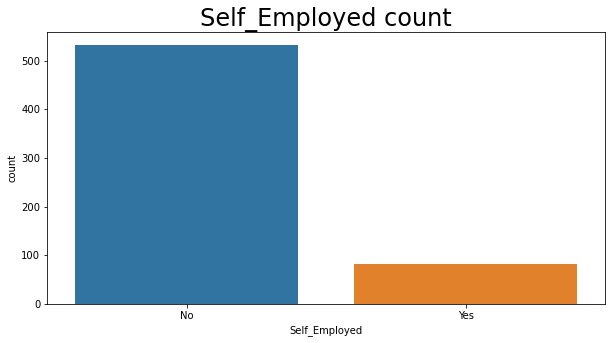

In [39]:
#count plot for categorical variable Attrition 
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=cat_loan, x="Self_Employed")
#plt.xticks(rotation=90)
plt.title("Self_Employed count", fontsize = 24)

Text(0.5, 1.0, 'Property Area count')

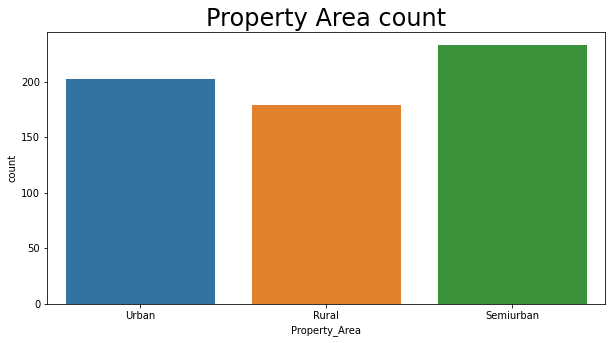

In [40]:
#count plot for categorical variable Attrition 
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=cat_loan, x="Property_Area")
#plt.xticks(rotation=90)
plt.title("Property Area count", fontsize = 24)

Text(0.5, 1.0, 'Loan_status count')

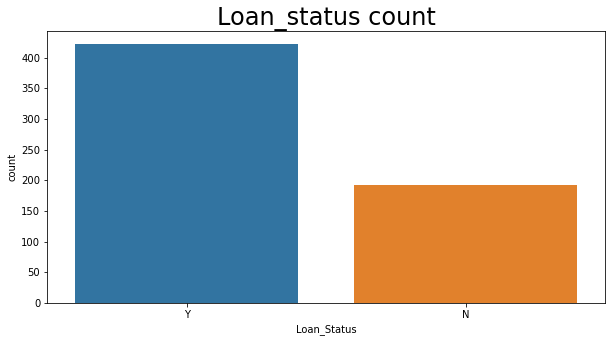

In [41]:
#count plot for categorical variable Attrition 
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=cat_loan, x="Loan_Status")
#plt.xticks(rotation=90)
plt.title("Loan_status count", fontsize = 24)

### Bivariate analysis

#### scatter lot to analysis discrete and continous values

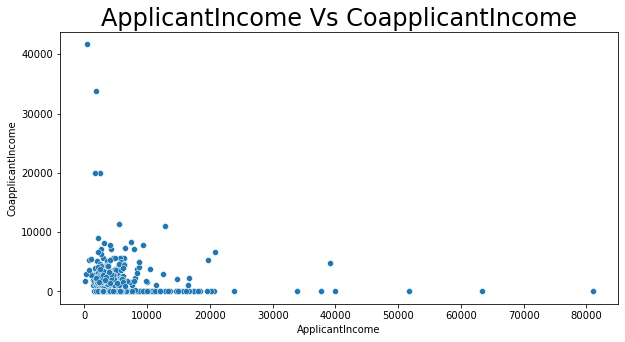

In [44]:
#plot to find relationship 
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
plt.title("ApplicantIncome Vs CoapplicantIncome", fontsize=24)
sns.scatterplot(x="ApplicantIncome", y="CoapplicantIncome", data=loan)


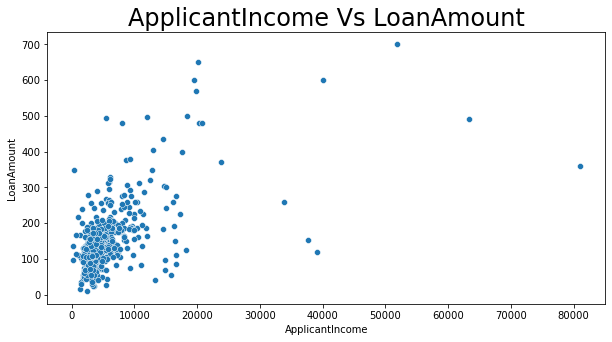

In [45]:
#plot to find relationship 
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
plt.title("ApplicantIncome Vs LoanAmount", fontsize=24)
sns.scatterplot(x="ApplicantIncome", y="LoanAmount", data=loan)


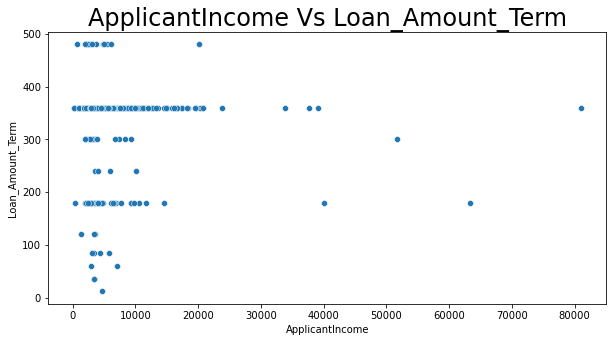

In [46]:
#plot to find relationship 
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
plt.title("ApplicantIncome Vs Loan_Amount_Term", fontsize=24)
sns.scatterplot(x="ApplicantIncome", y="Loan_Amount_Term", data=loan)


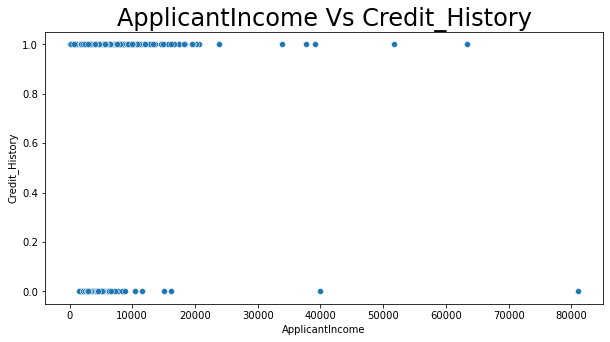

In [47]:
#plot to find relationship 
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
plt.title("ApplicantIncome Vs Credit_History", fontsize=24)
sns.scatterplot(x="ApplicantIncome", y="Credit_History", data=loan)


Text(0.5, 1.0, 'Credit History count')

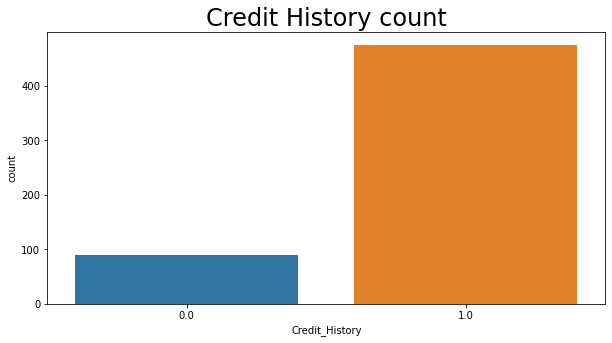

In [48]:
#count plot for categorical variable Attrition 
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=loan, x="Credit_History")
#plt.xticks(rotation=90)
plt.title("Credit History count", fontsize = 24)

#### Applying simple imputer on the orginal table

In [49]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = "most_frequent")
loan["Gender"] = imp.fit_transform(loan["Gender"].values.reshape(-1,1))
loan["Married"] = imp.fit_transform(loan["Married"].values.reshape(-1,1))
loan["Dependents"] = imp.fit_transform(loan["Dependents"].values.reshape(-1,1))
loan["Self_Employed"] = imp.fit_transform(loan["Self_Employed"].values.reshape(-1,1))



### Apply Label Encoding

In [50]:
cat_loan = ['Gender', 'Married', 'Education',
       'Self_Employed','Property_Area', 'Loan_Status']


# import the labelencoder
from sklearn.preprocessing import LabelEncoder

# initialize Labelencoder
LE = LabelEncoder()

for val in cat_loan:
    loan[val] = LE.fit_transform(loan[val])
    

In [52]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


#### The loan id column will not impact the prediction, we intend to drop the Loan id column.

In [53]:
loan = loan.drop("Loan_ID", axis=1)

In [54]:
loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [55]:
loan.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- Since LoanAmount, Loan_Amount_Term and credit_History seems to have null values,we can replace the null values using median. Median is a robust measure of central tendency and will not affect the distribution of datam

In [57]:
imp = SimpleImputer(strategy = "median")
loan["LoanAmount"] = imp.fit_transform(loan["LoanAmount"].values.reshape(-1,1))
loan["Loan_Amount_Term"] = imp.fit_transform(loan["Loan_Amount_Term"].values.reshape(-1,1))
loan["Credit_History"] = imp.fit_transform(loan["Credit_History"].values.reshape(-1,1))

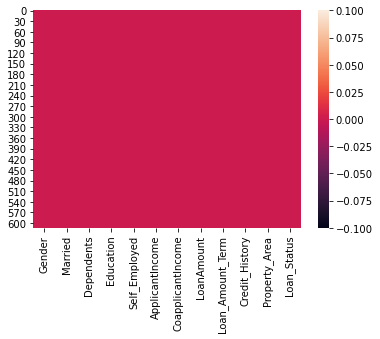

In [58]:
sns.heatmap(loan.isnull())

In [ ]:
#replace "3+" to 3
loan["Dependents"] = loan["Dependents"].replace(['3+'], 3)

In [65]:
loan["Dependents"] = loan["Dependents"].astype("int64")

In [66]:
loan["Dependents"].unique()

array([0, 1, 2, 3], dtype=int64)

In [67]:
loan.dtypes

Gender                 int32
Married                int32
Dependents             int64
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

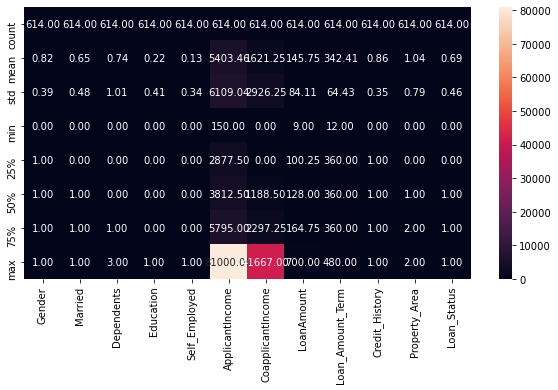

In [68]:
plt.figure(figsize = [10,5])
sns.heatmap(loan.describe(), annot=True, linecolor = "White", fmt = "0.2f")

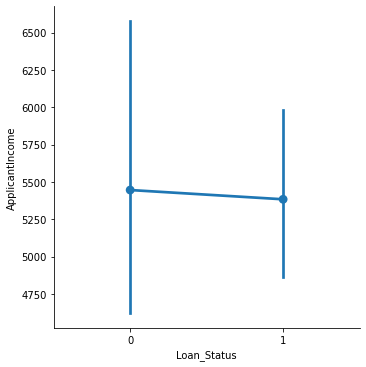

In [73]:
sns.catplot(x="Loan_Status", y="ApplicantIncome",  kind="point", split=True, estimator = np.mean, data=loan)

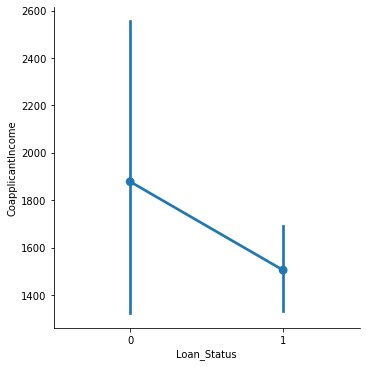

In [74]:
sns.catplot(x="Loan_Status", y="CoapplicantIncome",  kind="point", split=True, estimator = np.mean, data=loan)

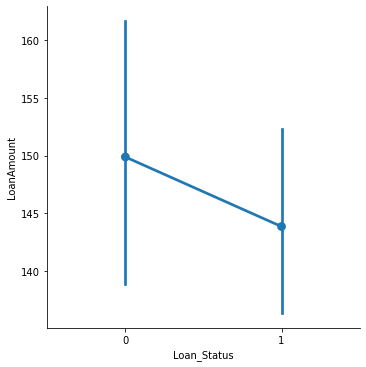

In [75]:
sns.catplot(x="Loan_Status", y="LoanAmount",  kind="point", split=True, estimator = np.mean, data=loan)

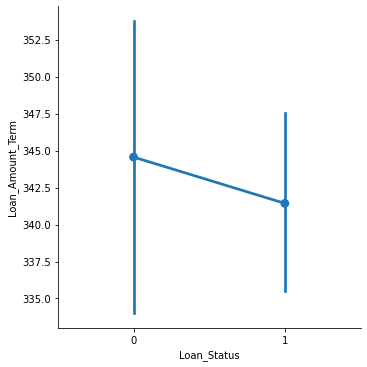

In [76]:
sns.catplot(x="Loan_Status", y="Loan_Amount_Term",  kind="point", split=True, estimator = np.mean, data=loan)

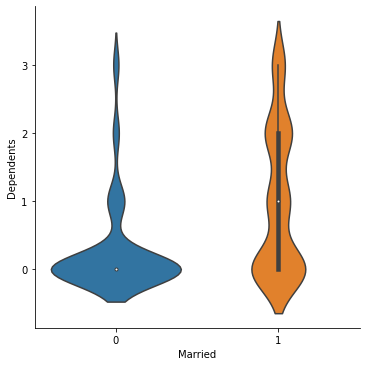

In [88]:
sns.catplot(x="Married", y="Dependents", kind="violin", split=True, data=loan)

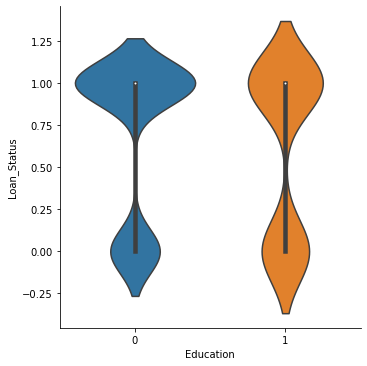

In [90]:
sns.catplot(x="Education", y="Loan_Status", kind="violin", split=True, data=loan)

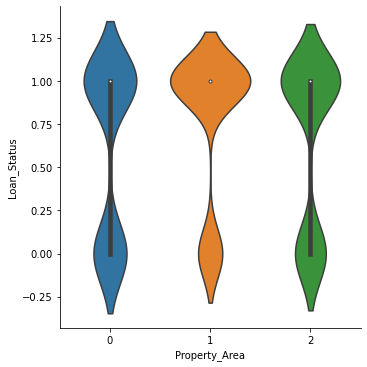

In [91]:
sns.catplot(x='Property_Area', y="Loan_Status", kind="violin", split=True, data=loan)

In [94]:
col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

for val in col:
    print(loan.groupby("Loan_Status")[val].median())
    print("\n")

Loan_Status
0    1
1    1
Name: Gender, dtype: int32


Loan_Status
0    1
1    1
Name: Married, dtype: int32


Loan_Status
0    0
1    0
Name: Dependents, dtype: int64


Loan_Status
0    0
1    0
Name: Education, dtype: int32


Loan_Status
0    0
1    0
Name: Self_Employed, dtype: int32


Loan_Status
0    3833.5
1    3812.5
Name: ApplicantIncome, dtype: float64


Loan_Status
0     268.0
1    1239.5
Name: CoapplicantIncome, dtype: float64


Loan_Status
0    128.0
1    128.0
Name: LoanAmount, dtype: float64


Loan_Status
0    360.0
1    360.0
Name: Loan_Amount_Term, dtype: float64


Loan_Status
0    1.0
1    1.0
Name: Credit_History, dtype: float64


Loan_Status
0    1
1    1
Name: Property_Area, dtype: int32


Loan_Status
0    0
1    1
Name: Loan_Status, dtype: int32




### multivariate analysis

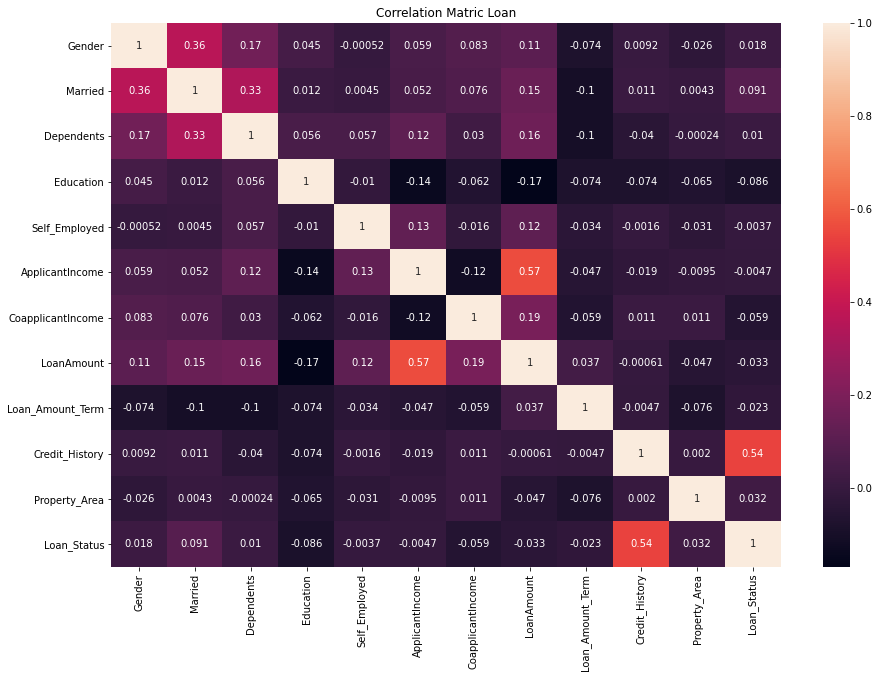

In [96]:
correlation = loan.corr()
plt.figure(figsize = [15,10])
sns.heatmap(correlation, annot=True)
plt.title("Correlation Matric Loan")
plt.show()

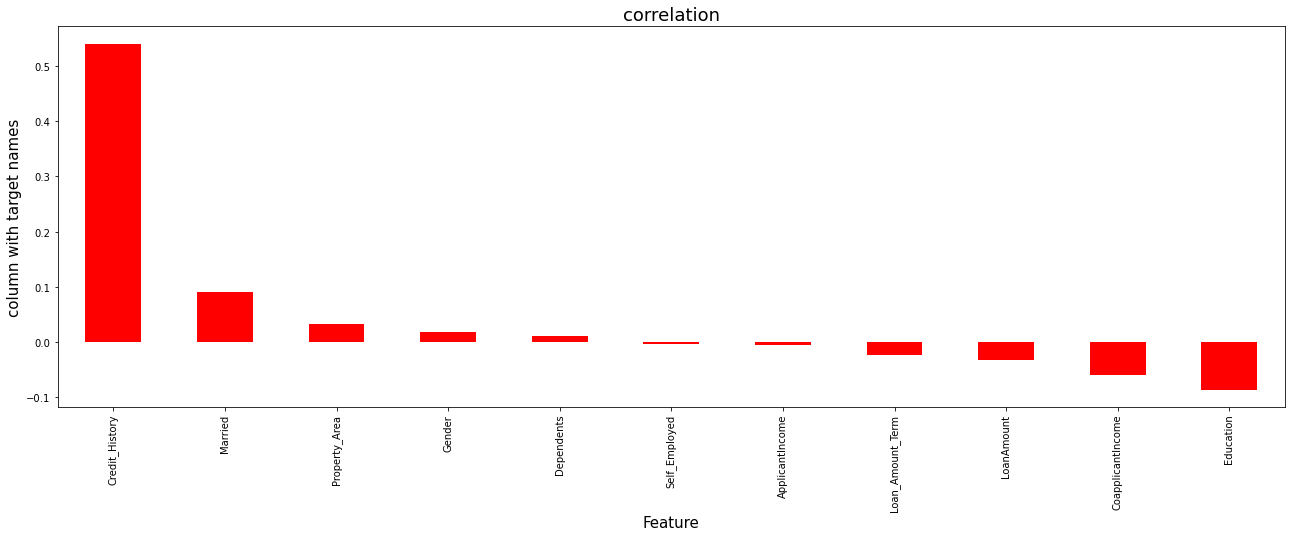

In [97]:
plt.figure(figsize=(22,7))
loan.corr()["Loan_Status"].sort_values(ascending = False).drop(["Loan_Status"]).plot(kind = "bar", color = "r")
plt.xlabel("Feature", fontsize = 15)
plt.ylabel("column with target names", fontsize = 15)
plt.title("correlation", fontsize=18)
plt.show()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text major ticklabel objects>)

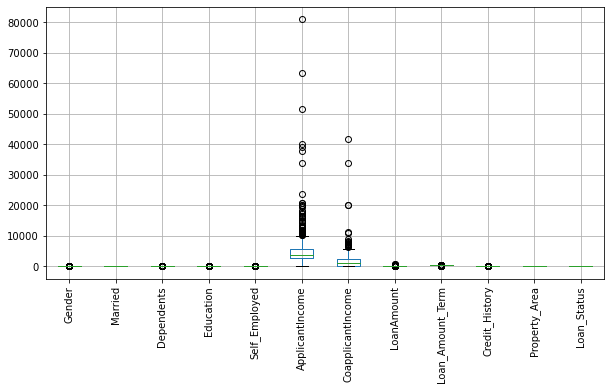

In [102]:
loan.boxplot(figsize=[10,5])
plt.xticks(rotation=90)

'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'

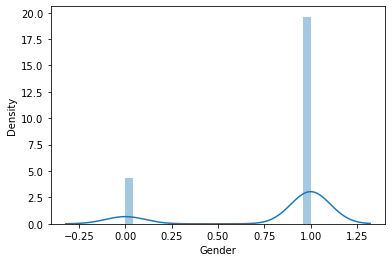

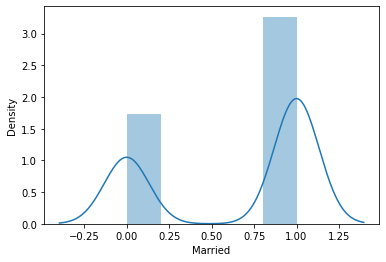

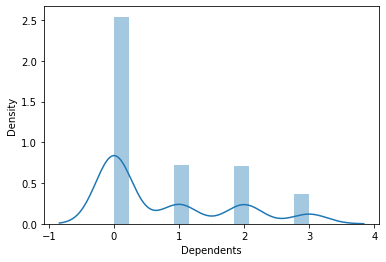

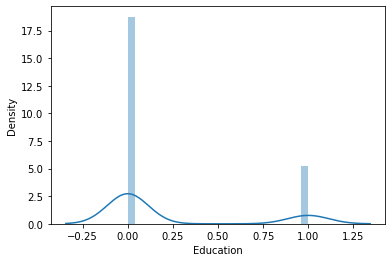

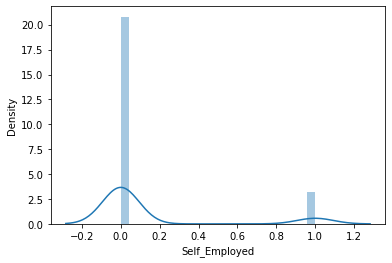

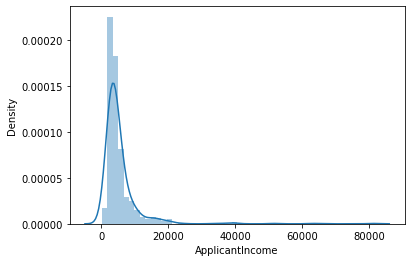

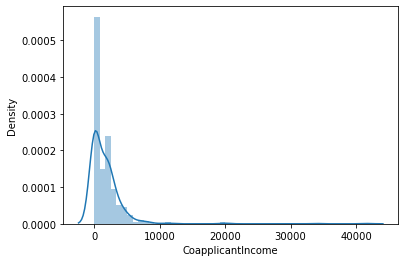

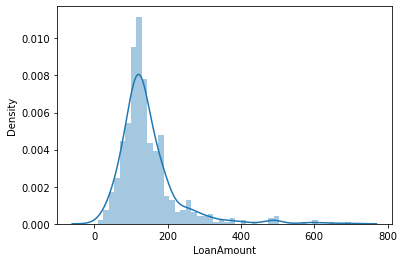

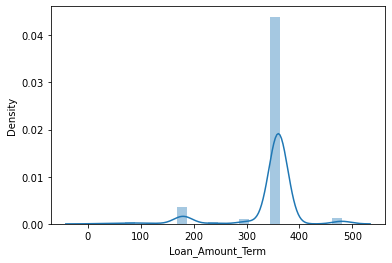

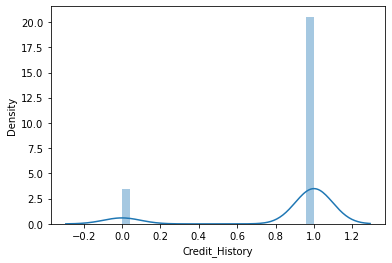

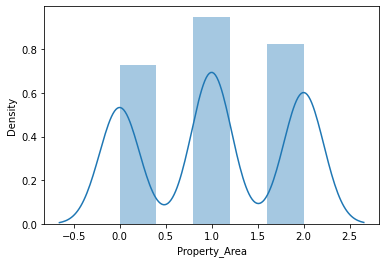

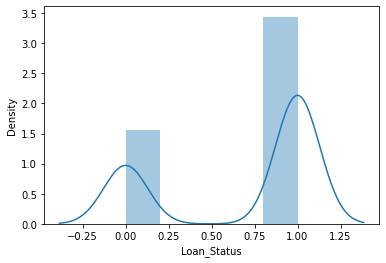

In [104]:
for val in col:
    sns.distplot(loan[val], kde=True)
    plt.show()

#### Applicant income, CoapplicantIncome, LoanAmount are lefted skewed

In [105]:
copy_quant = loan[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].copy()

In [106]:
#import power_transform
from sklearn.preprocessing import power_transform

loan_copy = power_transform(copy_quant)

loan_copy = pd.DataFrame(loan_copy, columns = copy_quant.columns)

In [107]:
loan_copy

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.544331,-1.102837,-0.025462
1,0.170974,0.750578,-0.025462
2,-0.499955,-1.102837,-1.339826
3,-0.743873,0.891686,-0.155876
4,0.582817,-1.102837,0.170931
...,...,...,...
609,-0.554885,-1.102837,-1.197589
610,-0.000290,-1.102837,-2.296436
611,1.023487,0.208603,1.381387
612,0.931750,-1.102837,0.750522


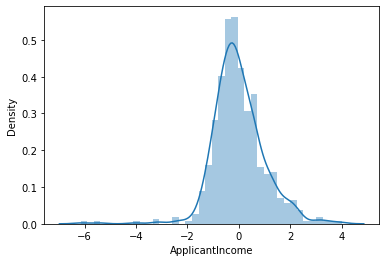

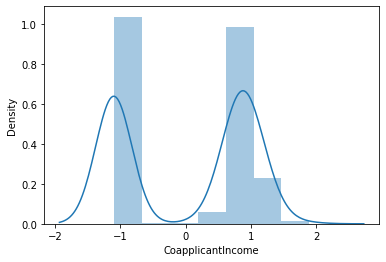

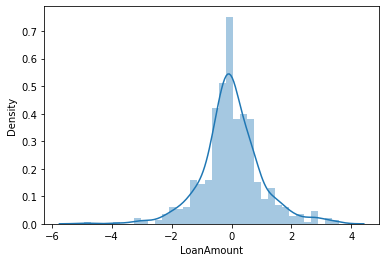

In [108]:
for val in loan_copy.columns:
    sns.distplot(loan_copy[val], kde=True)
    plt.show()

In [110]:
loan_copy.skew()

ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.020831
dtype: float64

In [111]:
for val in loan_copy.columns:
    loan = loan.drop(val, axis =1)

In [112]:
loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [113]:
pred_loan = pd.concat([loan,loan_copy], axis=1, join="inner")

In [114]:
pred_loan.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount
0,1,0,0,0,0,360.0,1.0,2,1,0.544331,-1.102837,-0.025462
1,1,1,1,0,0,360.0,1.0,0,0,0.170974,0.750578,-0.025462
2,1,1,0,0,1,360.0,1.0,2,1,-0.499955,-1.102837,-1.339826
3,1,1,0,1,0,360.0,1.0,2,1,-0.743873,0.891686,-0.155876
4,1,0,0,0,0,360.0,1.0,2,1,0.582817,-1.102837,0.170931


In [116]:
pred_loan.shape

(614, 12)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text major ticklabel objects>)

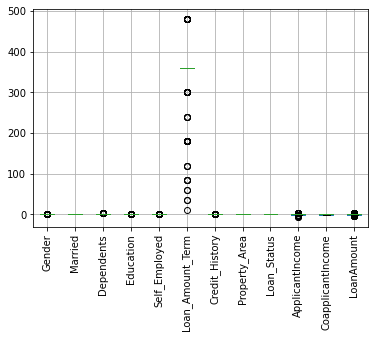

In [118]:
pred_loan.boxplot()
plt.xticks(rotation=90)

In [120]:
from scipy.stats import zscore
z= np.abs(zscore(pred_loan))


In [121]:
threshold = 3
print(np.where(z>3))

(array([ 14,  14,  68,  94,  94, 130, 133, 133, 155, 155, 171, 171, 185,
       188, 216, 242, 262, 313, 333, 369, 409, 443, 468, 495, 497, 500,
       546, 555, 561, 568, 575, 585, 600], dtype=int64), array([ 5, 11,  5,  5, 11, 11,  5, 11,  9, 11,  9, 11,  9,  9,  9,  5,  5,
        5,  9, 11,  9,  9,  9,  5,  5,  9,  5, 11, 11, 11,  5,  5,  9],
      dtype=int64))


In [122]:
pred_loan = pred_loan[(z<3).all(axis=1)]

In [123]:
pred_loan

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount
0,1,0,0,0,0,360.0,1.0,2,1,0.544331,-1.102837,-0.025462
1,1,1,1,0,0,360.0,1.0,0,0,0.170974,0.750578,-0.025462
2,1,1,0,0,1,360.0,1.0,2,1,-0.499955,-1.102837,-1.339826
3,1,1,0,1,0,360.0,1.0,2,1,-0.743873,0.891686,-0.155876
4,1,0,0,0,0,360.0,1.0,2,1,0.582817,-1.102837,0.170931
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,360.0,1.0,0,1,-0.554885,-1.102837,-1.197589
610,1,1,3,0,0,180.0,1.0,0,1,-0.000290,-1.102837,-2.296436
611,1,1,1,0,0,360.0,1.0,2,1,1.023487,0.208603,1.381387
612,1,1,2,0,0,360.0,1.0,2,1,0.931750,-1.102837,0.750522


In [125]:
pred_loan.shape

(586, 12)

#### percentage of dataloss

In [127]:
loss = (614-586)/614*100
print(loss)

4.5602605863192185


# Spliting the independent and dependant variables

In [128]:
x = pred_loan.drop("Loan_Status", axis=1)
y = pred_loan["Loan_Status"]

In [129]:
print(x.shape)
print(y.shape)

(586, 11)
(586,)


In [130]:
#scaling standardize the model thus the prediction come out with accuracy
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

x =scale.fit_transform(x)
#scaled 

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
maxAccu = 0
maxRS = 0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predf = LR.predict(x_test)
    acc = accuracy_score(y_test, predf)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ", maxAccu, " on Random State ", maxRS)

Best accuracy is:  0.8920454545454546  on Random State  855


In [132]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = 855)

In [133]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(176, 11)
(176,)
(410, 11)
(410,)


In [157]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))

0.8920454545454546
[[ 28  17]
 [  2 129]]
              precision    recall  f1-score   support

           0       0.93      0.62      0.75        45
           1       0.88      0.98      0.93       131

    accuracy                           0.89       176
   macro avg       0.91      0.80      0.84       176
weighted avg       0.90      0.89      0.88       176



In [144]:
from sklearn.model_selection import cross_val_score

lr_scr = cross_val_score(LR, x, y, cv = 6)
print("the cross validation score of Logisting regression model :", lr_scr.mean())

the cross validation score of Logisting regression model : 0.814099866750824


In [134]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

0.7613636363636364
[[35 10]
 [32 99]]
              precision    recall  f1-score   support

           0       0.52      0.78      0.62        45
           1       0.91      0.76      0.82       131

    accuracy                           0.76       176
   macro avg       0.72      0.77      0.72       176
weighted avg       0.81      0.76      0.77       176



In [151]:
from sklearn.model_selection import cross_val_score

dt_scr = cross_val_score(dt, x, y, cv = 7)
print("the cross validation score of Decision tree model :", dt_scr.mean())

the cross validation score of Decision tree model : 0.7320916318334564


In [152]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test, predrf))

0.8636363636363636
[[ 29  16]
 [  8 123]]
              precision    recall  f1-score   support

           0       0.78      0.64      0.71        45
           1       0.88      0.94      0.91       131

    accuracy                           0.86       176
   macro avg       0.83      0.79      0.81       176
weighted avg       0.86      0.86      0.86       176



In [159]:
from sklearn.model_selection import cross_val_score

rf_scr = cross_val_score(rf, x, y, cv = 5)
print("the cross validation score of random forest model :", rf_scr.mean())

the cross validation score of random forest model : 0.7935245545415036


In [160]:
diff = round((accuracy_score(y_test, predlr))*100) - round((lr_scr.mean())*100)
print("The difference for Logestic Regression is: " , diff )

diff = round((accuracy_score(y_test, preddt))*100) - round((dt_scr.mean())*100)
print("The difference for Decision Tree is: " , diff )

diff = round((accuracy_score(y_test, predrf))*100) - round((rf_scr.mean())*100)
print("The difference for Random Forest is: " , diff )

The difference for Logestic Regression is:  8.0
The difference for Decision Tree is:  3.0
The difference for Random Forest is:  7.0


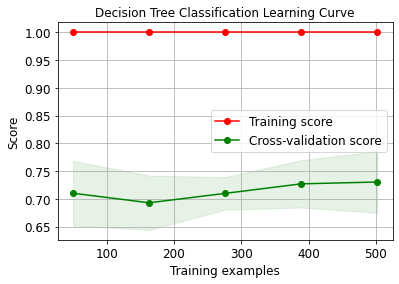

In [162]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(dt, x, y,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Decision Tree Classification Learning Curve");

# Hyper Parameter tuning

In [163]:
from sklearn.model_selection import GridSearchCV

In [164]:
#creating parameters list to pass in Grid SearchCV

parameters = {'max_depth': np.arange(2,15),
              "criterion": ["gini","entropy"]
    
}

In [165]:
GCV = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5)

In [166]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [167]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [168]:
GCV_pred = GCV.best_estimator_.predict(x_test)

In [169]:
accuracy_score(y_test, GCV_pred)

0.8863636363636364

In [170]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

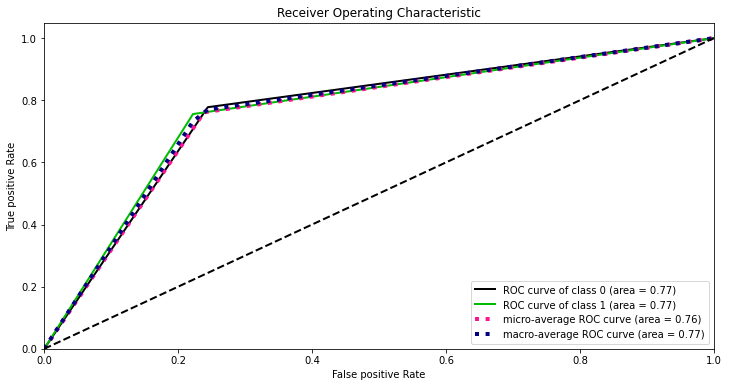

In [171]:
from sklearn.metrics import roc_curve, auc

test_prob = dt.predict_proba(x_test)

skplt.metrics.plot_roc_curve(y_test, test_prob,
                       title="Digits ROC Curve", figsize=(12,6));

plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc = "lower right")
plt.show()

In [172]:
import joblib
joblib.dump(GCV.best_estimator_, "loanpredictionfinal.pkl")

['loanpredictionfinal.pkl']

In [174]:
joblib.dump(GCV.best_estimator_, "loanpredictionfinal.obj")

['loanpredictionfinal.obj']

In [175]:
import numpy as np
a = np.array(y_test)
predicted = np.array(GCV_pred)
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_con

,orginal,predicted
0,1,1
1,0,1
2,1,1
3,1,1
4,1,1
...,...,...
171,1,1
172,1,1
173,0,0
174,1,1
